In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt
import matplotlib  as plt2
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC

In [27]:
df = pd.read_csv("../datasets/kidney_disease_dataset.csv")
data = pd.read_csv("../datasets/kidney_disease_dataset.csv")
df.head()

,Age of the patient,Blood pressure (mm/Hg),Specific gravity of urine,Albumin in urine,Sugar in urine,Red blood cells in urine,Pus cells in urine,Pus cell clumps in urine,Bacteria in urine,Random blood glucose level (mg/dl),...,Smoking status,Body Mass Index (BMI),Physical activity level,Duration of diabetes mellitus (years),Duration of hypertension (years),Cystatin C level,Urinary sediment microscopy results,C-reactive protein (CRP) level,Interleukin-6 (IL-6) level,Target
0,54,167,1.023,1,4,normal,abnormal,not present,not present,96,...,yes,25.3,low,4,16,0.67,normal,4.88,10.23,No_Disease
1,42,127,1.023,3,2,normal,normal,not present,present,73,...,no,20.6,moderate,3,13,0.55,abnormal,4.49,13.11,Low_Risk
2,38,148,1.016,0,0,abnormal,normal,not present,not present,77,...,no,38.4,high,11,23,2.37,abnormal,4.57,13.27,No_Disease
3,7,98,1.017,4,0,abnormal,normal,not present,present,225,...,no,24.7,high,24,3,2.54,abnormal,8.57,12.36,No_Disease
4,67,174,1.015,1,1,normal,abnormal,not present,not present,376,...,yes,17.6,high,22,24,1.90,normal,6.75,1.46,No_Disease


In [28]:
df.columns

Index(['Age of the patient', 'Blood pressure (mm/Hg)',
       'Specific gravity of urine', 'Albumin in urine', 'Sugar in urine',
       'Red blood cells in urine', 'Pus cells in urine',
       'Pus cell clumps in urine', 'Bacteria in urine',
       'Random blood glucose level (mg/dl)', 'Blood urea (mg/dl)',
       'Serum creatinine (mg/dl)', 'Sodium level (mEq/L)',
       'Potassium level (mEq/L)', 'Hemoglobin level (gms)',
       'Packed cell volume (%)', 'White blood cell count (cells/cumm)',
       'Red blood cell count (millions/cumm)', 'Hypertension (yes/no)',
       'Diabetes mellitus (yes/no)', 'Coronary artery disease (yes/no)',
       'Appetite (good/poor)', 'Pedal edema (yes/no)', 'Anemia (yes/no)',
       'Estimated Glomerular Filtration Rate (eGFR)',
       'Urine protein-to-creatinine ratio', 'Urine output (ml/day)',
       'Serum albumin level', 'Cholesterol level',
       'Parathyroid hormone (PTH) level', 'Serum calcium level',
       'Serum phosphate level', 'Family hi

In [29]:
df.drop(columns=['Pedal edema (yes/no)'], inplace=True)

In [30]:
df['Bacteria in urine']=df['Bacteria in urine'].map({'present': 1, 'not present': 0})
df['Urinary sediment microscopy results']=df['Urinary sediment microscopy results'].map({'abnormal': 1, 'normal': 0})
df['Physical activity level']=df['Physical activity level'].map({'low':0, 'moderate':1, 'high':2})
df['Smoking status']=df['Smoking status'].map({'yes':1, 'no':0})
df['Hypertension (yes/no)']=df['Hypertension (yes/no)'].map({'yes':1, 'no':0})
df['Diabetes mellitus (yes/no)']=df['Diabetes mellitus (yes/no)'].map({'yes':1, 'no':0})
df['Coronary artery disease (yes/no)']=df['Coronary artery disease (yes/no)'].map({'yes':1, 'no':0})
df['Appetite (good/poor)']=df['Appetite (good/poor)'].map({'good':1, 'poor':0})
df['Anemia (yes/no)']=df['Anemia (yes/no)'].map({'yes':1, 'no':0})
df['Family history of chronic kidney disease']=df['Family history of chronic kidney disease'].map({'yes':1, 'no':0})
df['Pus cell clumps in urine']=df['Pus cell clumps in urine'].map({'present': 1, 'not present': 0})
df['Pus cells in urine']=df['Pus cells in urine'].map({'abnormal': 1, 'normal': 0})
df['Red blood cells in urine']=df['Red blood cells in urine'].map({'abnormal': 1, 'normal': 0})


In [31]:
df.shape

(20538, 42)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20538 entries, 0 to 20537
Data columns (total 42 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Age of the patient                           20538 non-null  int64  
 1   Blood pressure (mm/Hg)                       20538 non-null  int64  
 2   Specific gravity of urine                    20538 non-null  float64
 3   Albumin in urine                             20538 non-null  int64  
 4   Sugar in urine                               20538 non-null  int64  
 5   Red blood cells in urine                     20538 non-null  int64  
 6   Pus cells in urine                           20538 non-null  int64  
 7   Pus cell clumps in urine                     20538 non-null  int64  
 8   Bacteria in urine                            20538 non-null  int64  
 9   Random blood glucose level (mg/dl)           20538 non-null  int64  
 10

In [33]:
df.isnull().sum()

Age of the patient                             0
Blood pressure (mm/Hg)                         0
Specific gravity of urine                      0
Albumin in urine                               0
Sugar in urine                                 0
Red blood cells in urine                       0
Pus cells in urine                             0
Pus cell clumps in urine                       0
Bacteria in urine                              0
Random blood glucose level (mg/dl)             0
Blood urea (mg/dl)                             0
Serum creatinine (mg/dl)                       0
Sodium level (mEq/L)                           0
Potassium level (mEq/L)                        0
Hemoglobin level (gms)                         0
Packed cell volume (%)                         0
White blood cell count (cells/cumm)            0
Red blood cell count (millions/cumm)           0
Hypertension (yes/no)                          0
Diabetes mellitus (yes/no)                     0
Coronary artery dise

In [34]:
df.describe()

,Age of the patient,Blood pressure (mm/Hg),Specific gravity of urine,Albumin in urine,Sugar in urine,Red blood cells in urine,Pus cells in urine,Pus cell clumps in urine,Bacteria in urine,Random blood glucose level (mg/dl),...,Family history of chronic kidney disease,Smoking status,Body Mass Index (BMI),Physical activity level,Duration of diabetes mellitus (years),Duration of hypertension (years),Cystatin C level,Urinary sediment microscopy results,C-reactive protein (CRP) level,Interleukin-6 (IL-6) level
count,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,...,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000,20538.000000
mean,47.477895,130.352079,1.015041,2.501266,2.494595,0.499854,0.500243,0.501412,0.495910,284.630295,...,0.497371,0.498831,27.544240,1.000000,14.918152,14.946879,1.749459,0.501607,5.061633,7.702504
std,24.941947,29.063838,0.005793,1.697084,1.701059,0.500012,0.500012,0.500010,0.499995,124.633265,...,0.500005,0.500011,7.221082,0.817887,8.963722,8.945500,0.718980,0.500010,2.853217,4.191765
min,5.000000,80.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,...,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.100000,0.500000
25%,26.000000,105.000000,1.010000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,176.000000,...,0.000000,0.000000,21.300000,0.000000,7.000000,7.000000,1.130000,0.000000,2.600000,4.050000
50%,47.000000,131.000000,1.015000,3.000000,2.000000,0.000000,1.000000,1.000000,0.000000,284.500000,...,0.000000,0.000000,27.600000,1.000000,15.000000,15.000000,1.750000,1.000000,5.070000,7.710000
75%,69.000000,156.000000,1.020000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,393.000000,...,1.000000,1.000000,33.800000,2.000000,23.000000,23.000000,2.370000,1.000000,7.537500,11.297500
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,500.000000,...,1.000000,1.000000,40.000000,2.000000,30.000000,30.000000,3.000000,1.000000,10.000000,15.000000


In [35]:
df['Target'].value_counts()

Target
No_Disease        16432
Low_Risk           2054
Moderate_Risk       821
High_Risk           821
Severe_Disease      410
Name: count, dtype: int64

In [36]:
df = df.dropna(subset=['Target'])

label_encoder = LabelEncoder()
# Encode the target variable
df['Target'] = df['Target'].map({'No_Disease':0, 'Low_Risk':1, 'Moderate_Risk':2, 'Severe_Disease':3, 'High_Risk':4})

# Separate features and target
X = df.drop('Target', axis=1)
y = df['Target']

In [37]:
data['Target'].unique()

array(['No_Disease', 'Low_Risk', 'Moderate_Risk', 'Severe_Disease',
       'High_Risk'], dtype=object)

In [38]:
data['Target'].head(10)

0    No_Disease
1      Low_Risk
2    No_Disease
3    No_Disease
4    No_Disease
5    No_Disease
6    No_Disease
7    No_Disease
8    No_Disease
9    No_Disease
Name: Target, dtype: object

In [39]:
df['Target'].head(10)

0    0
1    1
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Target, dtype: int64

In [40]:
scaler=StandardScaler()
# Standardize the features
X_scaled = scaler.fit_transform(X)

In [41]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(X.shape, X_train.shape, X_test.shape)

(20538, 41) (16430, 41) (4108, 41)


In [42]:
X

,Age of the patient,Blood pressure (mm/Hg),Specific gravity of urine,Albumin in urine,Sugar in urine,Red blood cells in urine,Pus cells in urine,Pus cell clumps in urine,Bacteria in urine,Random blood glucose level (mg/dl),...,Family history of chronic kidney disease,Smoking status,Body Mass Index (BMI),Physical activity level,Duration of diabetes mellitus (years),Duration of hypertension (years),Cystatin C level,Urinary sediment microscopy results,C-reactive protein (CRP) level,Interleukin-6 (IL-6) level
0,54,167,1.023,1,4,0,1,0,0,96,...,0,1,25.3,0,4,16,0.67,0,4.88,10.23
1,42,127,1.023,3,2,0,0,0,1,73,...,1,0,20.6,1,3,13,0.55,1,4.49,13.11
2,38,148,1.016,0,0,1,0,0,0,77,...,0,0,38.4,2,11,23,2.37,1,4.57,13.27
3,7,98,1.017,4,0,1,0,0,1,225,...,0,0,24.7,2,24,3,2.54,1,8.57,12.36
4,67,174,1.015,1,1,0,1,0,0,376,...,0,1,17.6,2,22,24,1.90,0,6.75,1.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20533,86,113,1.008,5,3,0,1,0,0,473,...,1,0,38.2,0,25,1,2.77,0,2.45,9.31
20534,47,80,1.016,3,4,0,1,0,0,477,...,1,0,26.8,1,3,7,1.81,0,4.19,3.45
20535,89,178,1.011,3,5,1,1,0,0,141,...,1,1,30.0,0,6,25,1.32,1,5.32,8.39
20536,86,138,1.009,1,5,1,0,0,1,110,...,1,1,28.9,0,0,21,2.52,1,0.61,9.53


### SVM 

In [43]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [44]:
X_train_predictionsvm=svm.predict(X_train)
train_prediction_accuracysvm=accuracy_score(X_train_predictionsvm,y_train)*100
print('Accuracy on Training data : ', train_prediction_accuracysvm)

Accuracy on Training data :  79.95130858186245


In [45]:
X_test_predictionsvm=svm.predict(X_test)
test_prediction_accuracysvm=accuracy_score(X_test_predictionsvm,y_test)*100
print('Accuracy on Testing data : ', test_prediction_accuracysvm)

Accuracy on Testing data :  80.23369036027263


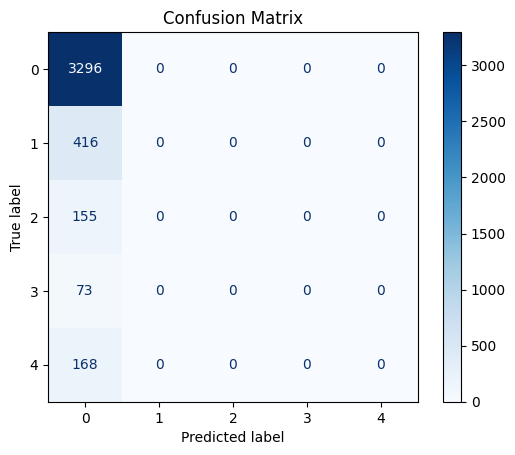

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      3296
           1       0.00      0.00      0.00       416
           2       0.00      0.00      0.00       155
           3       0.00      0.00      0.00        73
           4       0.00      0.00      0.00       168

    accuracy                           0.80      4108
   macro avg       0.16      0.20      0.18      4108
weighted avg       0.64      0.80      0.71      4108



c:\Users\Akash_PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Akash_PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Akash_PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred))

### RANDOM FOREST

In [47]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [48]:
X_train_predictionrfc=RFC.predict(X_train)
train_prediction_accuracyrfc=accuracy_score(X_train_predictionrfc,y_train)*100
print('Accuracy on Training data : ', train_prediction_accuracyrfc)

Accuracy on Training data :  100.0


In [49]:
X_test_predictionrfc=RFC.predict(X_test)
test_prediction_accuracyrfc=accuracy_score(X_test_predictionrfc,y_test)*100
print('Accuracy on Testing data : ', test_prediction_accuracyrfc)

Accuracy on Testing data :  80.23369036027263


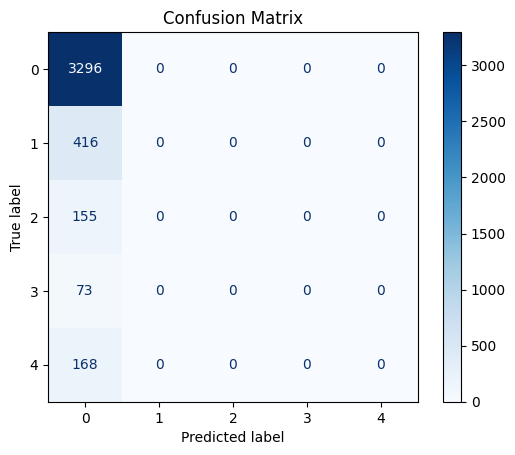

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      3296
           1       0.00      0.00      0.00       416
           2       0.00      0.00      0.00       155
           3       0.00      0.00      0.00        73
           4       0.00      0.00      0.00       168

    accuracy                           0.80      4108
   macro avg       0.16      0.20      0.18      4108
weighted avg       0.64      0.80      0.71      4108



c:\Users\Akash_PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Akash_PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Akash_PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = RFC.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RFC.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred))

### DECISION TREE

In [51]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [52]:
x_train_predictiondtc=dtc.predict(X_train)
dtc_train_prediction_accuracydtc=accuracy_score(x_train_predictiondtc,y_train)*100
print('Accuracy on Training data : ', dtc_train_prediction_accuracydtc)

Accuracy on Training data :  100.0


In [53]:
x_test_predictiondtc=dtc.predict(X_test)
dtc_test_prediction_accuracydtc=accuracy_score(x_test_predictiondtc,y_test)*100
print('Accuracy on Testing data : ', dtc_test_prediction_accuracydtc)

Accuracy on Testing data :  63.1207400194742


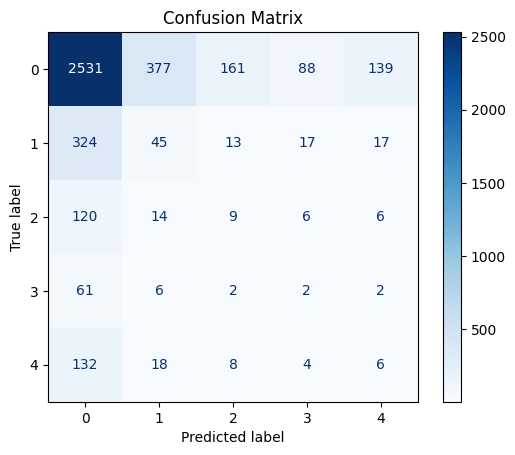

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.78      3296
           1       0.10      0.11      0.10       416
           2       0.05      0.06      0.05       155
           3       0.02      0.03      0.02        73
           4       0.04      0.04      0.04       168

    accuracy                           0.63      4108
   macro avg       0.20      0.20      0.20      4108
weighted avg       0.65      0.63      0.64      4108



In [54]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = dtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred))

### ACCURACY

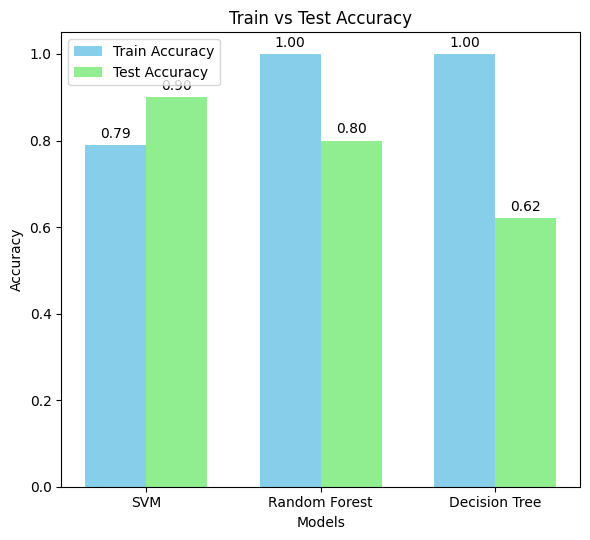

In [55]:
import numpy as np
train_accuracy = [0.79, 1, 1] 
test_accuracy = [0.90, 0.80, 0.62]   

models = ['SVM', 'Random Forest', 'Decision Tree']
X = np.arange(len(models))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(6,5.5))

# Bars for Train and Test
rects1 = ax.bar(X - width/2, train_accuracy, width, label='Train Accuracy', color='skyblue')
rects2 = ax.bar(X + width/2, test_accuracy, width, label='Test Accuracy', color='lightgreen')

# Labels and Title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Train vs Test Accuracy')
ax.set_xticks(X)
ax.set_xticklabels(models)
ax.legend()

# Add accuracy labels on top of bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

plt.tight_layout()
plt.show()

### EXPORTING MODEL

In [61]:
import pickle

In [62]:
kidney_model = '../models/kidney_disease_model.sav'
pickle.dump(svm, open(kidney_model, 'wb'))

In [64]:
df.to_csv('../datasets/Kidney(Cleaned).csv')